<a href="https://colab.research.google.com/github/Fario-codes/SPARKS-FOUNDATION-TASKS/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author :Mohammed Farid Ul Ali N

Task-1 Prediction Using Supervised ML
The task is to predict the percentage of a student based on the number of hours studied. This will be done using linear regression using two variables.

Importing Libraries
I started by importing pandas, numpy, matplotlib and sikit learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

Step-1 Reading The Data

In [2]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000



Step-2 Data Visualization

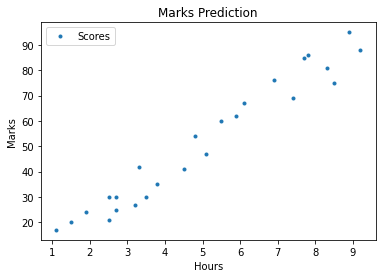

In [5]:
dataset.plot(x='Hours', y='Scores', style='.')
plt.title('Marks Prediction')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.show()

Step-3 Model Training

In [6]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,1].values

In [7]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)
regressor=LinearRegression()
regressor.fit(X_train.reshape(-1,1), Y_train)
print("Model is trained")

Model is trained


Step-4 Plotting the Line of Regression

In [8]:
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


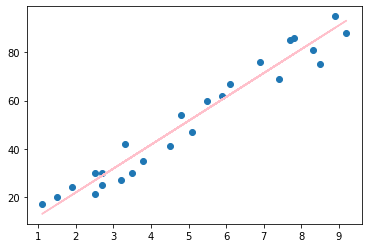

In [9]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,Y)
plt.plot(X,line,color="pink");
plt.show()

Step-5 Making Predictions and Comparing

In [12]:
print(X_test) 
Y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
print('Training score:', regressor.score(X_train, Y_train))
print('Test score:', regressor.score(X_test, Y_test))

Training score: 0.9515510725211553
Test score: 0.9454906892105354


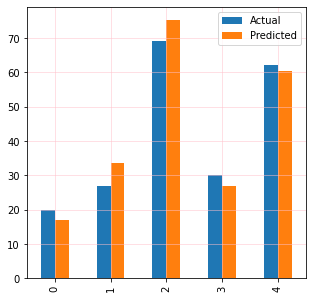

In [16]:
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='pink')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [17]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred=regressor.predict(test)
print("Number of Hours={}".format(hours))
print("Predicted Marks={}".format(own_pred[0]))

Number of Hours=9.25
Predicted Marks=93.69173248737539


Step-6 Evaluation

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354
